In [69]:
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
dataset = pd.read_csv('finaldataset.csv')
dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,Label
0,-0.263502,-0.167903,-0.446342,-0.005728,0.039776,0.011514,0.037622,-0.041895,-0.041791,0.072465,...,0.000063,-0.000136,0.000141,-0.000093,0.000126,-3.975933e-06,0.000629,-0.000012,-0.000010,0
1,-0.538172,0.767607,0.328654,-0.473975,0.148248,-0.063536,0.449899,-0.005152,-0.011905,-0.200623,...,0.000016,0.000295,-0.001125,0.000740,0.000209,-5.568686e-07,0.000184,-0.000019,-0.000048,0
2,-0.598868,0.871351,0.480035,-0.522922,0.243959,0.172053,0.179860,-0.021183,-0.054757,-0.028758,...,0.000576,-0.000865,0.003551,-0.002204,-0.000963,-1.324140e-05,0.000099,0.000035,0.000003,0
3,-0.269532,-0.167819,-0.446780,-0.003435,0.051544,0.005336,0.032856,-0.031816,-0.043031,0.066463,...,0.000061,-0.000086,0.000459,-0.000174,-0.000378,1.344395e-05,0.000765,-0.000027,0.000013,0
4,1.301458,1.493234,0.443243,-0.585408,0.526601,0.436103,0.073433,0.140542,-0.157768,0.095442,...,-0.002067,0.002237,0.002377,-0.000196,-0.003152,2.844513e-05,-0.000816,-0.000008,0.000609,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.077835,0.528904,-0.638154,-0.162049,0.005191,0.733870,0.000879,-0.048069,0.634075,-0.203996,...,0.002381,0.000581,0.000115,0.001120,-0.003417,2.356347e-06,0.002237,-0.000023,-0.000235,1
59996,-0.267291,-0.167952,-0.447170,-0.004093,0.047140,0.008548,0.035052,-0.036177,-0.042960,0.070113,...,0.000014,-0.000077,0.000515,-0.000204,-0.000874,1.033951e-05,0.001310,-0.000026,0.000012,0
59997,0.084310,-0.727216,0.303984,-0.043225,-0.343127,0.157525,0.042986,-0.117888,-0.077339,-0.113971,...,-0.003512,0.005160,0.001533,0.000776,0.004196,-2.853988e-05,-0.001357,0.000005,0.000051,0
59998,-0.249318,-0.168080,-0.445541,-0.010482,0.009916,0.028458,0.048470,-0.068136,-0.038032,0.088134,...,-0.000114,-0.000197,-0.000635,0.000170,0.000311,-4.528510e-05,0.001228,-0.000025,-0.000066,0


In [71]:
X = dataset.drop('Label', axis=1)    
Y = dataset['Label']

In [72]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,              
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [73]:
datasettest = pd.read_csv('test.csv')
X_val = datasettest.drop('Label', axis=1)    
y_val = datasettest['Label']

In [74]:
y_pred = rf_classifier.predict(X_val)

In [75]:
import pickle
with open('LIME.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.929
Precision: 0.9281086823573117
Recall: 0.929
F1 Score: 0.9236414133649635


In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

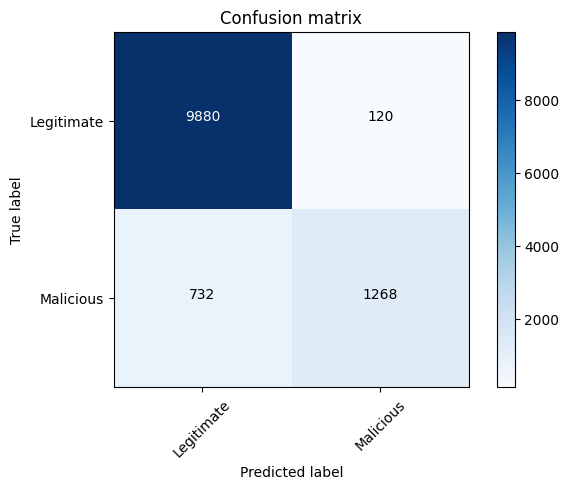

In [78]:
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix
import itertools
confusion_mtx = confusion_matrix(y_val, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = ["Legitimate","Malicious"])